In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
train_df= pd.read_excel("C:/Users/DELL/Desktop/Flight Price Prediction\Data_Train.xlsx")

In [252]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [253]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [254]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [255]:
train_df = train_df.dropna(axis=0)

In [256]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [257]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [258]:
train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [259]:
train_df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [260]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [261]:
train_df['Total_Stops'] = train_df['Total_Stops'].replace(['non-stop','1 stop','2 stops','3 stops','4 stops'], [0,1,2,3,4])

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

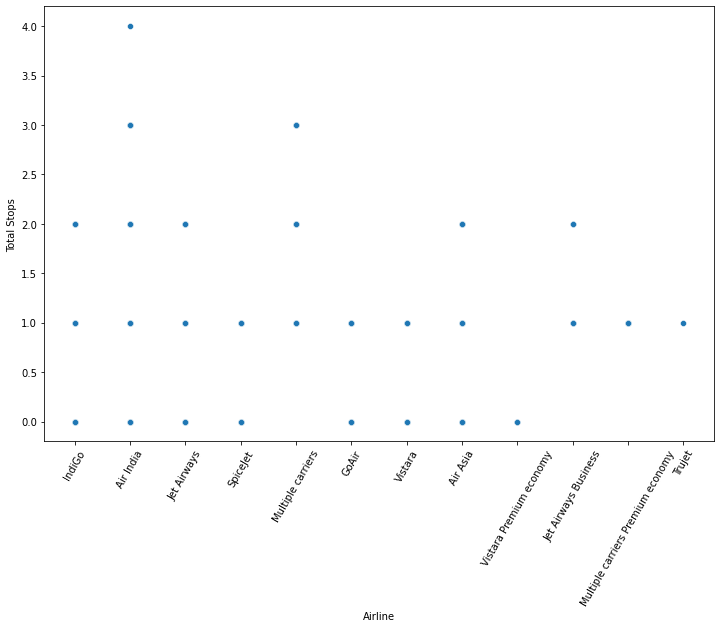

In [262]:
plt.figure(figsize = (12,8))
sns.scatterplot(train_df['Airline'], train_df['Total_Stops'], data = train_df)
plt.xlabel('Airline')
plt.ylabel('Total Stops')
plt.xticks(rotation = 60)

In [263]:
train_df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [264]:
train_df['Additional_Info'] = train_df['Additional_Info'].replace({'No info': 'No Info'})

In [265]:
train_df['Additional_Info'].value_counts()

No Info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [266]:
train_df['Duration'] = train_df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [267]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No Info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No Info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No Info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No Info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No Info,13302


In [268]:
train_df['Day_of_Journey'] = train_df['Date_of_Journey'].str.split('/').str[0].astype(int)
train_df['Month_of_Journey'] = train_df['Date_of_Journey'].str.split('/').str[1].astype(int)
train_df.drop(['Date_of_Journey'], axis = 1, inplace = True)

In [269]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No Info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No Info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No Info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No Info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No Info,13302,1,3


In [270]:
train_df['Dep_Hr'] = pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['Dep_Min'] = pd.to_datetime(train_df['Dep_Time']).dt.minute
train_df.drop(['Dep_Time'], axis = 1, inplace = True)

In [271]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hr,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,170,0,No Info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,445,2,No Info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,1140,2,No Info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,325,1,No Info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,285,1,No Info,13302,1,3,16,50


In [272]:
train_df['Arrival_Hr'] = pd.to_datetime(train_df['Arrival_Time']).dt.hour
train_df['Arrival_Min'] = pd.to_datetime(train_df['Arrival_Time']).dt.minute
train_df.drop(['Arrival_Time'], axis = 1, inplace = True)

In [273]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hr,Dep_Min,Arrival_Hr,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No Info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No Info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No Info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No Info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No Info,13302,1,3,16,50,21,35


Text(0, 0.5, 'Number of flights')

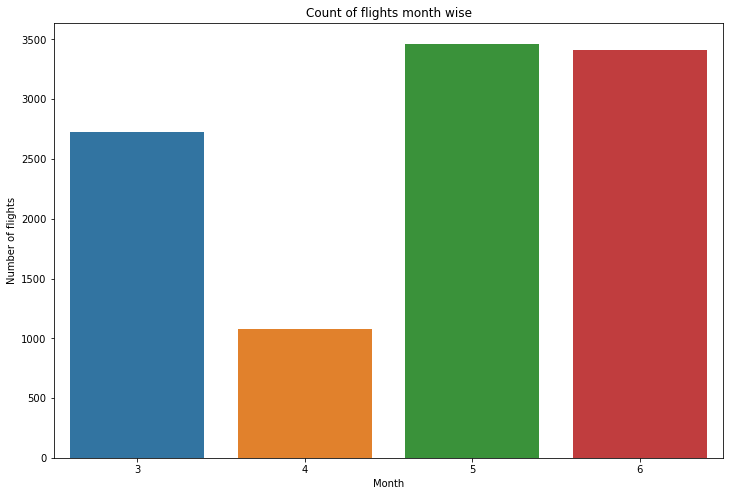

In [274]:
plt.figure(figsize = (12, 8))
ax=sns.countplot(x = 'Month_of_Journey', data = train_df)
plt.title('Count of flights month wise')
plt.xlabel('Month')
plt.ylabel('Number of flights')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

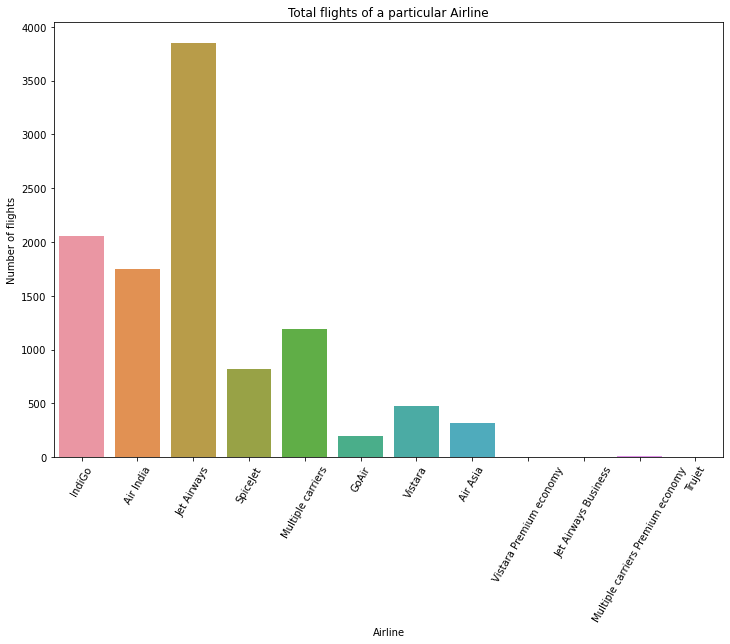

In [275]:
plt.figure(figsize = (12, 8))
ax=sns.countplot(x = 'Airline', data = train_df)
plt.title('Total flights of a particular Airline')
plt.xlabel('Airline')
plt.ylabel('Number of flights')
plt.xticks(rotation = 60)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

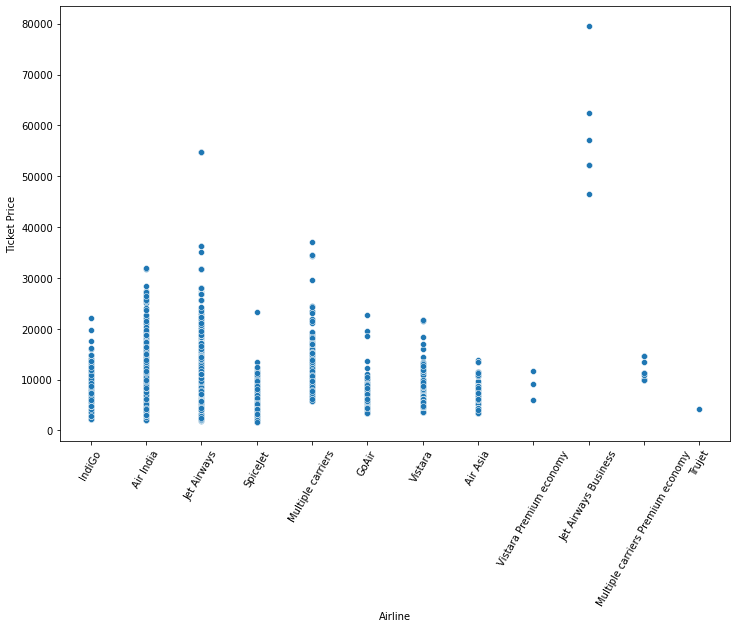

In [276]:
plt.figure(figsize = (12, 8))
sns.scatterplot(train_df['Airline'], train_df['Price'], data = train_df)
plt.xlabel('Airline')
plt.ylabel('Ticket Price')
plt.xticks(rotation = 60)

In [277]:
from sklearn.preprocessing import LabelEncoder

In [278]:
le = LabelEncoder()
text_data = train_df[['Airline','Source','Route','Additional_Info']].apply(LabelEncoder().fit_transform)
text_data.head()

,Airline,Source,Route,Additional_Info
0,3,0,18,6
1,1,3,84,6
2,4,2,118,6
3,3,3,91,6
4,3,0,29,6


In [279]:
num_data = train_df.select_dtypes(include = ['int32', 'int64', 'float'])

In [280]:
new_train_df = pd.concat([text_data, num_data], axis = 1)
new_train_df.head()

,Airline,Source,Route,Additional_Info,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hr,Dep_Min,Arrival_Hr,Arrival_Min
0,3,0,18,6,170,0,3897,24,3,22,20,1,10
1,1,3,84,6,445,2,7662,1,5,5,50,13,15
2,4,2,118,6,1140,2,13882,9,6,9,25,4,25
3,3,3,91,6,325,1,6218,12,5,18,5,23,30
4,3,0,29,6,285,1,13302,1,3,16,50,21,35


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'Airline'),
  Text(0, 1.5, 'Source'),
  Text(0, 2.5, 'Route'),
  Text(0, 3.5, 'Additional_Info'),
  Text(0, 4.5, 'Duration'),
  Text(0, 5.5, 'Total_Stops'),
  Text(0, 6.5, 'Price'),
  Text(0, 7.5, 'Day_of_Journey'),
  Text(0, 8.5, 'Month_of_Journey'),
  Text(0, 9.5, 'Dep_Hr'),
  Text(0, 10.5, 'Dep_Min'),
  Text(0, 11.5, 'Arrival_Hr'),
  Text(0, 12.5, 'Arrival_Min')])

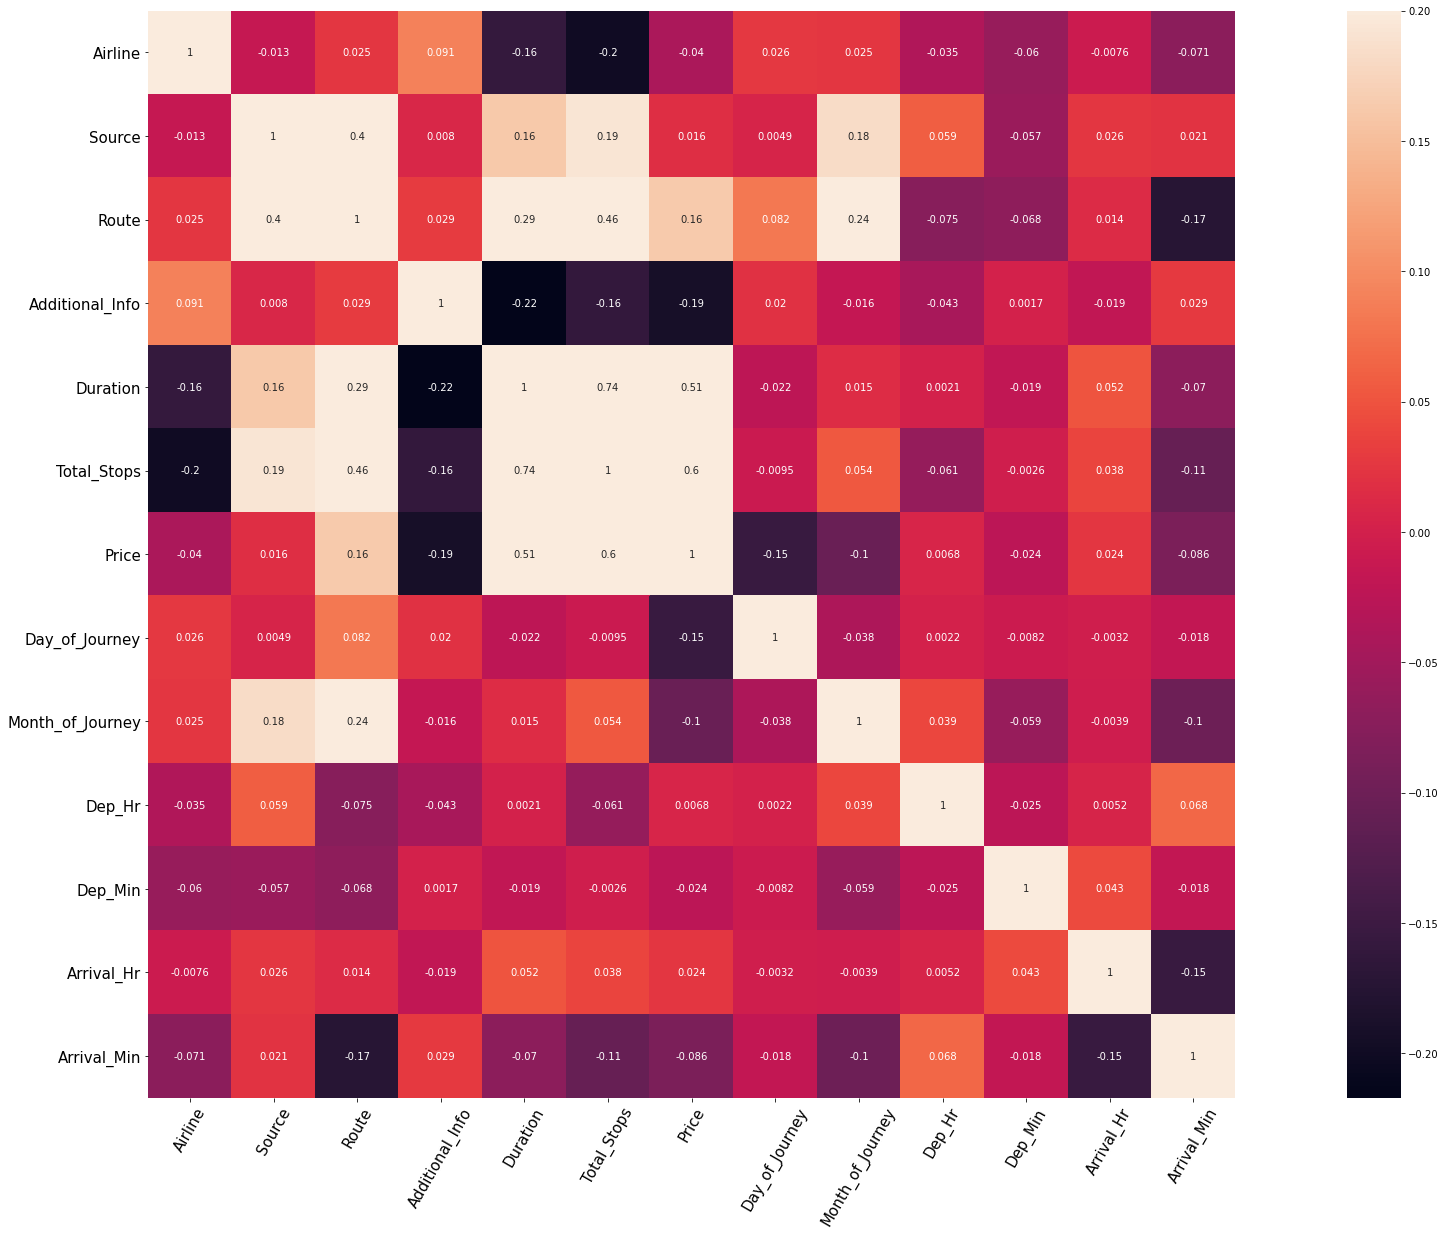

In [299]:
plt.figure(figsize=(40,20))
sns.heatmap(new_train_df.corr(), vmax=0.2, square=True, annot=True)
plt.xticks(fontsize = 15, rotation = 60)
plt.yticks(fontsize = 15)

In [281]:
X = new_train_df.drop('Price', axis = 1)
y = new_train_df['Price']

In [282]:
X.shape

(10682, 12)

In [283]:
X.head()

,Airline,Source,Route,Additional_Info,Duration,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hr,Dep_Min,Arrival_Hr,Arrival_Min
0,3,0,18,6,170,0,24,3,22,20,1,10
1,1,3,84,6,445,2,1,5,5,50,13,15
2,4,2,118,6,1140,2,9,6,9,25,4,25
3,3,3,91,6,325,1,12,5,18,5,23,30
4,3,0,29,6,285,1,1,3,16,50,21,35


In [284]:
y.shape

(10682,)

In [285]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64